# Nicht generatives Trainig mit DeepHull simple loss

In [1]:
from script.NeuralNets.Networks import ICNN, SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.NeuralNets.trainFunction import train_icnn
from script.eval import Plots_for
from script.Verification.Verification import verification

In [2]:
sequential = False
epochs = 3
batch_size = 1
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

if not sequential:
    icnn = ICNN([2, 10, 10, 1])
else:
    icnn = SequentialNN([2, 10, 10, 1])

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()

dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

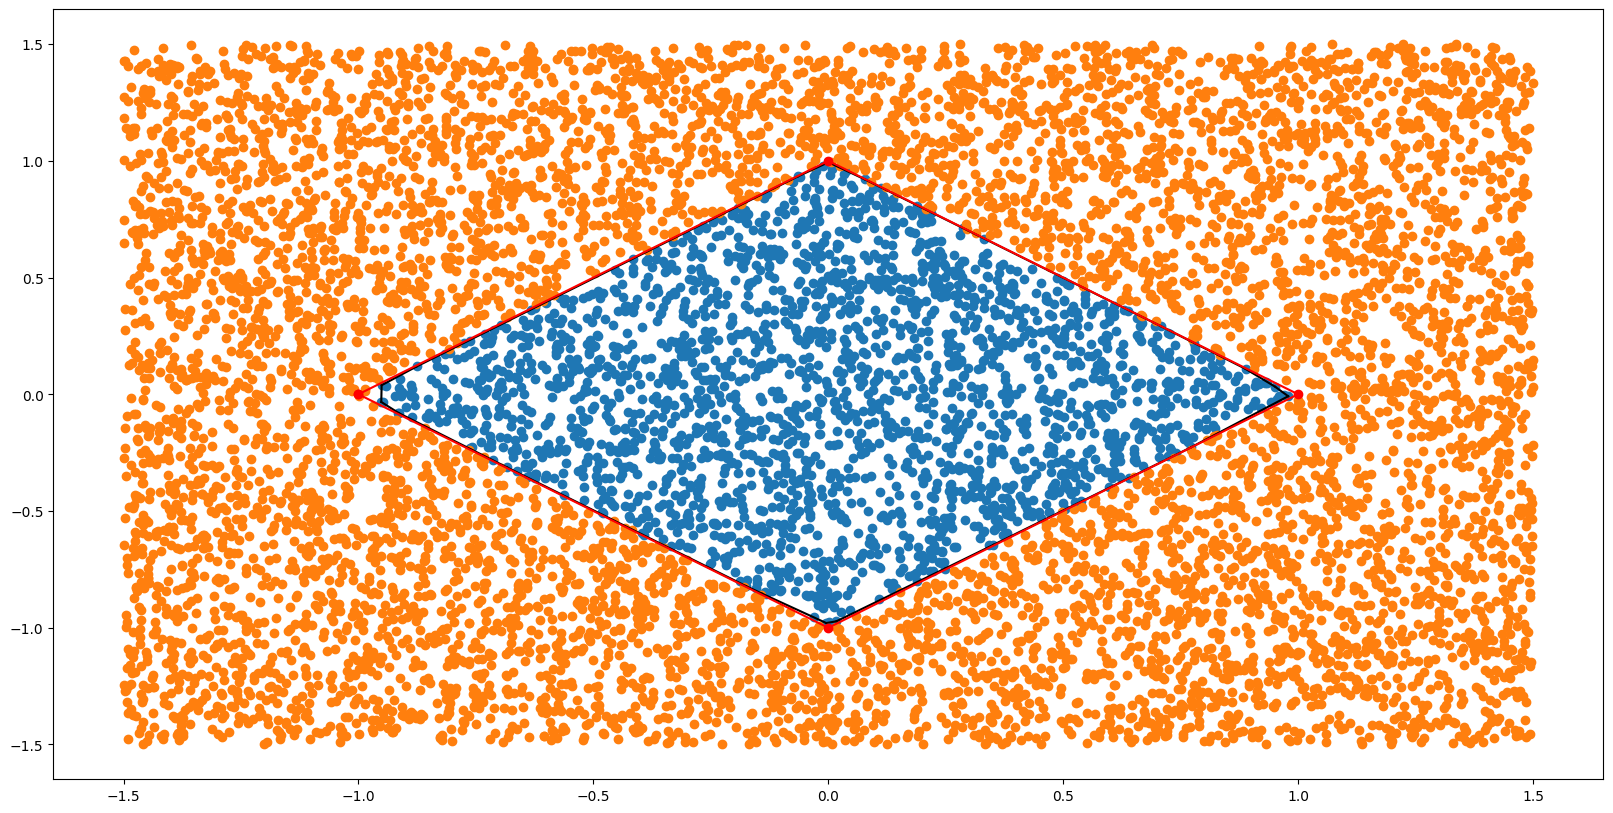

In [4]:
plots = Plots_for(0, icnn, included_space, ambient_space, x_range, y_range, extr=true_extremal_points)
plots.plt_initial()

In [5]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, sequential=sequential, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 0.9696437376308698
batch = 100, mean loss = 1.3520349548701516
batch = 200, mean loss = 1.3499803563577333
batch = 300, mean loss = 1.3374748662928748
batch = 400, mean loss = 1.296936674234606
batch = 500, mean loss = 1.2605699363966743
batch = 600, mean loss = 1.2265539602822646
batch = 700, mean loss = 1.1968946541100995
batch = 800, mean loss = 1.1693652622199513
batch = 900, mean loss = 1.1396617329831835
batch = 1000, mean loss = 1.1087033551465302
batch = 1100, mean loss = 1.0795885843287396
batch = 1200, mean loss = 1.0539777127748342
batch = 1300, mean loss = 1.0287450357010115
batch = 1400, mean loss = 1.0060593473048705
batch = 1500, mean loss = 0.9862889381123351
batch = 1600, mean loss = 0.9638255134105018
batch = 1700, mean loss = 0.9444055396857786
batch = 1800, mean loss = 0.9259596410288174
batch = 1900, mean loss = 0.9061796912794929
batch = 2000, mean loss = 0.888482893487335
batch = 2100, mean loss = 0.873906506145026
batch = 2

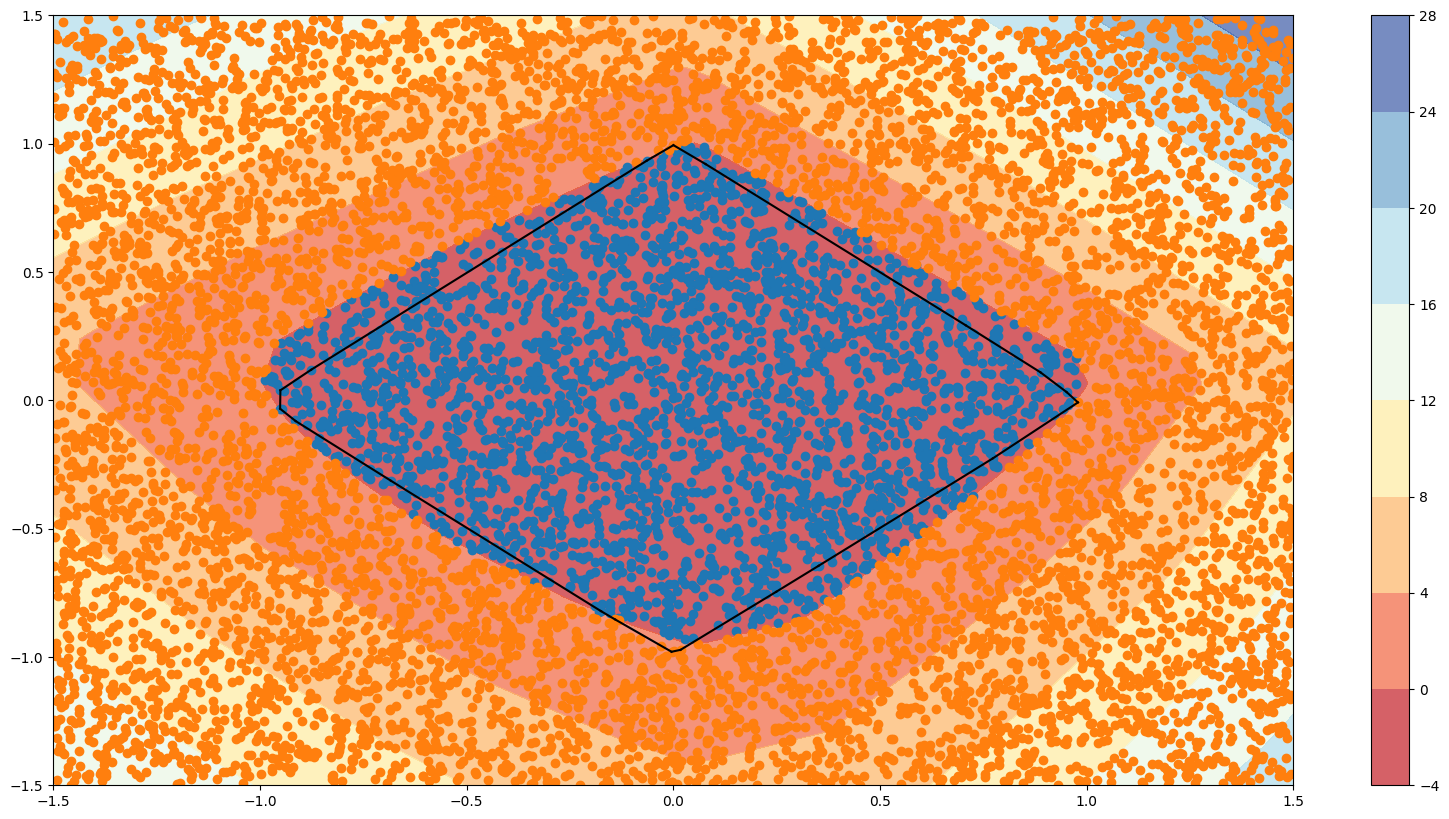

In [6]:
plots.plt_mesh()

In [7]:
A, b = Rhombus().get_A(), Rhombus().get_b()
result = verification(icnn, A_b=[A, b], sequential=sequential)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-12
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 138 rows, 96 columns and 393 nonzeros
Model fingerprint: 0xb548cc9c
Variable types: 76 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [9e-05, 5e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 5e+03]
  RHS range        [3e-02, 5e+03]
Found heuristic solution: objective -3.0799824
Presolve removed 68 rows and 45 columns
Presolve time: 0.01s
Presolved: 70 rows, 51 columns, 281 nonzeros
Variable types: 34 continuous, 17 integer (17 binary)

Root relaxation: objective 2.529717e+01, 39 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  

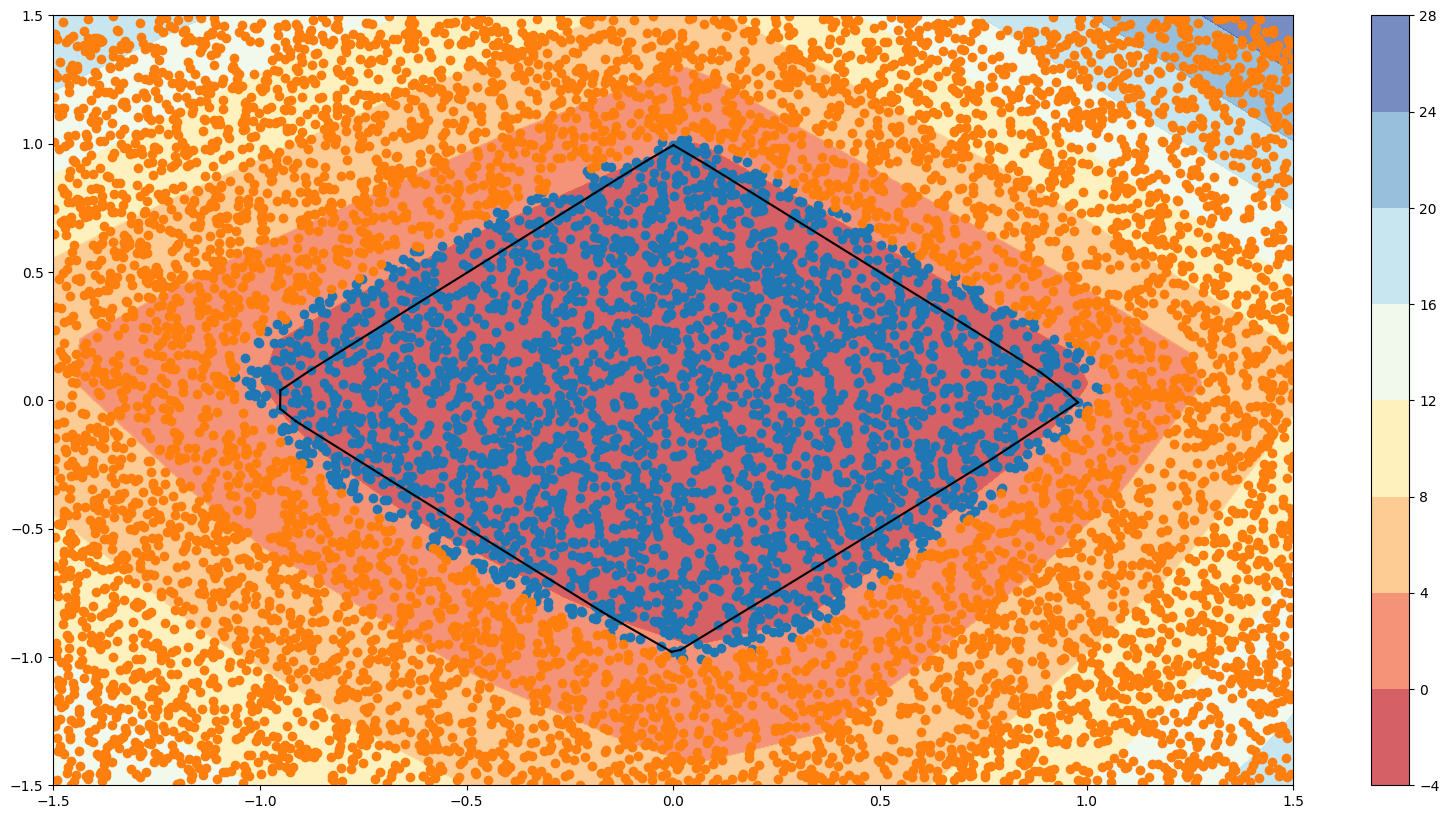

In [8]:
input_data, plots.c = result
plots.plt_mesh()